In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = (224,224,3)

train_path = '/content/drive/MyDrive/Dataset/Training Data'
valid_path = '/content/drive/MyDrive/Dataset/Test Data'

In [ ]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Training Data/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
 
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Training Data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 832 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test Data',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 257 images belonging to 10 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
26/26 [==============================] - 507s 19s/step - loss: 1.5025 - accuracy: 0.5445 - val_loss: 1.0481 - val_accuracy: 0.5914
Epoch 2/50
26/26 [==============================] - 129s 5s/step - loss: 0.4239 - accuracy: 0.8678 - val_loss: 1.2428 - val_accuracy: 0.5525
Epoch 3/50
26/26 [==============================] - 126s 5s/step - loss: 0.2911 - accuracy: 0.9087 - val_loss: 1.4733 - val_accuracy: 0.5564
Epoch 4/50
26/26 [==============================] - 125s 5s/step - loss: 0.2048 - accuracy: 0.9399 - val_loss: 1.3641 - val_accuracy: 0.5914
Epoch 5/50
26/26 [==============================] - 124s 5s/step - loss: 0.1700 - accuracy: 0.9555 - val_loss: 1.4821 - val_accuracy: 0.6226
Epoch 6/50
26/26 [==============================] - 123s 5s/step - loss: 0.1189 - accuracy: 0.9724 - val_loss: 1.6833 - val_accuracy: 0.6070
Epoch 7/50
26/26 [==============================] - 124s 5s/step - loss: 0.1103 - accuracy: 0.9712 - val_loss: 1.5706 - val_accuracy: 0.6031
Epoch 8/50
2

In [ ]:
print("Accuracy of the model is-" , model.evaluate(training_set)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_set)[0])

26/26 [==============================] - 96s 4s/step - loss: 0.0094 - accuracy: 0.9988
Accuracy of the model is- 99.87980723381042 %
257/257 [==============================] - 28s 109ms/step - loss: 2.5897 - accuracy: 0.6187
loss of the model is- 2.589693784713745


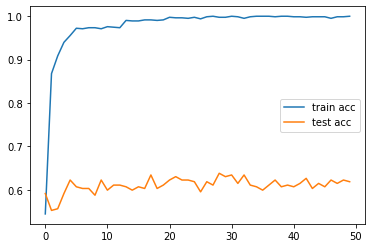

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

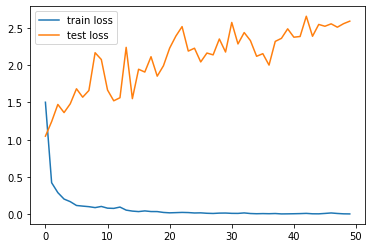

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/newVGG16.h5')

In [ ]:

y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[2.9098018e-04, 1.3476806e-02, 8.9775998e-04, ..., 6.1018477e-06,
        4.6966106e-01, 1.9431506e-07],
       [6.4802036e-04, 2.7317823e-05, 1.4570162e-01, ..., 9.2575990e-02,
        7.5387883e-01, 6.6362787e-03],
       [9.9965346e-01, 2.9011789e-08, 1.7309018e-06, ..., 5.3809320e-08,
        3.1713280e-04, 3.5800784e-07],
       ...,
       [7.8787984e-05, 1.3941487e-03, 4.5476656e-05, ..., 4.3138693e-06,
        9.9803025e-01, 7.2679695e-06],
       [1.7687916e-10, 4.8385073e-06, 7.1857789e-07, ..., 1.5218557e-05,
        3.6080129e-07, 1.4679006e-08],
       [6.5430475e-04, 2.0348575e-06, 4.2030623e-04, ..., 1.2644922e-02,
        1.3739315e-05, 1.0967340e-03]], dtype=float32)